INSA ROUEN <br>
MS ESD 2019-2020 <br>
Winnie VORIHILALA <br>

# <center> ML2 - TP3 : Sélection de modèle  </center>

Les objectifs de ce TP sont :
- mise en œuvre d’une prodécude de sélection de modèle via le grid search
- prise en charge de données catégorielles

# 1- Classification de données Splice

Les jonctions d'épissage sont des points d'une séquence d'ADN au cours desquels l'ADN «superflu» est éliminé au cours du processus de création de protéines dans les organismes supérieurs. Le problème que nous cherchons à résoudre est de reconnaître, étant donné une séquence d'ADN, les frontières entre les exons (aussi appelé site IE, et qui correspondent aux parties de la séquence d'ADN conservées après l'épissage) et les introns (aussi appelé EI, et qui correspondent aux parties de la séquence d'ADN qui sont épissées). Pour plus de détails, voir les 2 liens ci-dessous : <br>
- https://archive.ics.uci.edu/ml/datasets/Molecular+Biology+(Splice-junction+Gene+Sequences) <br>
- http://www.cs.toronto.edu/~delve/data/splice/spliceDetail.html <br>

## Chargement des librairies


In [109]:
from __future__ import print_function
from __future__ import division

from sklearn.datasets import load_svmlight_file 
#La bibliothèque SVM-Light implémente la machine à vecteurs de support de Vapnik, 
# mais le format a été adopté ailleurs et peut être utilisé pour de nombreuses tâches d'apprentissage 
# automatique, y compris la classification et la régression

# SVMlight est une implémentation de SVM, format d'entrée spécial pour représenter les données d'apprentissage 
# et de test 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from matplotlib.colors import ListedColormap

import pandas as pd
import seaborn as sb
# import matplotlib as plt
import numpy as np

import scipy.io as sio #to load matlab file
import scipy.sparse

from sklearn.metrics import accuracy_score, roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder #convertir var catégorielle en var quantitative

from sklearn import datasets
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier #kppv


from sklearn.svm import SVC

from sklearn.model_selection import KFold

from sklearn.model_selection import GridSearchCV

from sklearn import linear_model

from sklearn.metrics import confusion_matrix

import scipy.io as sio

from sklearn.metrics import accuracy_score, roc_curve, precision_score, recall_score, f1_score, cohen_kappa_score, roc_auc_score 

# accuracy_score : score de classification de précision (ou tout simplement PRECISION)
# ROC : limit aux cas de classification binaire


#from sklearn.metrics import accuracy_score
#from sklearn.metrics import precision_score
#from sklearn.metrics import recall_score
#from sklearn.metrics import f1_score
#from sklearn.metrics import cohen_kappa_score
#from sklearn.metrics import roc_auc_score

%matplotlib inline

# 1 - Chargement des données splice

In [3]:
X, Y = load_svmlight_file("./splice.txt")

In [17]:
print("X est de type",type(X))
print("Y est de type",type(Y))
print("\nX est de dimension",X.shape)
print("Y est de dimension",Y.shape)

X est de type <class 'scipy.sparse.csr.csr_matrix'>
Y est de type <class 'numpy.ndarray'>

X est de dimension (1000, 60)
Y est de dimension (1000,)


In [4]:
X

<1000x60 sparse matrix of type '<class 'numpy.float64'>'
	with 60000 stored elements in Compressed Sparse Row format>

On constate que X est une matrice sparse compressée de dimension 1000 x 60 composée de valeurs numériques décimales.

In [29]:
#Y

Y est un tableau composé de 2 classes : 1 et -1

## Modèle SVM non-linéaire avec noyau gaussien 

On veut apprendre un modèle SVM non-linéaire avec un noyau RBF (gausien) $k(x,z) = exp^{\gamma ||x-z||}$ en sélectionnant de façon appropriée les hyper-paramètres C du SVM et γ du noyau. Pour cela, on servira du module GridSearchCV.

Dans un premier temps, on construit une échelle logarithmique des deux vecteurs suivants qui vont être les valeurs possibles que peuvent prendre C et  γ :

In [22]:
gamma_grid = np.logspace(-3, 0, 30)
C_grid = np.logspace(-0.5, 1.5, 30)

On effectue alors une Grid Search sur la grille formée par les vecteurs précédemment définis.

In [26]:
#from sklearn.model_selection import GridSearchCV
#from sklearn.svm import SVC

# the grid
parameters = [{"gamma": gamma_grid, "C": C_grid}]

# the classifier
clf_rbf = SVC(kernel="rbf", tol=0.01)

# Perf a K-fold validation using the accuracy as the performance measure

K = 10 # feel free to adapt the value of $K$

# we will dot it on a grid search using n_jobs processors
clf_rbf = GridSearchCV(clf_rbf, param_grid=parameters, cv=K, scoring="accuracy", verbose=1, n_jobs = 2)

Lançons la sélection du modèle optimal et son apprentissage

In [27]:
clf_rbf.fit(X, Y)

Fitting 10 folds for each of 900 candidates, totalling 9000 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    8.4s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:   23.5s
[Parallel(n_jobs=2)]: Done 446 tasks      | elapsed:   50.1s
[Parallel(n_jobs=2)]: Done 796 tasks      | elapsed:  1.5min
[Parallel(n_jobs=2)]: Done 1246 tasks      | elapsed:  2.3min
[Parallel(n_jobs=2)]: Done 1796 tasks      | elapsed:  3.3min
[Parallel(n_jobs=2)]: Done 2446 tasks      | elapsed:  4.4min
[Parallel(n_jobs=2)]: Done 3196 tasks      | elapsed:  5.7min
[Parallel(n_jobs=2)]: Done 4046 tasks      | elapsed:  7.2min
[Parallel(n_jobs=2)]: Done 4996 tasks      | elapsed:  8.8min
[Parallel(n_jobs=2)]: Done 6046 tasks      | elapsed: 10.6min
[Parallel(n_jobs=2)]: Done 7196 tasks      | elapsed: 12.7min
[Parallel(n_jobs=2)]: Done 8446 tasks      | elapsed: 15.1min
[Parallel(n_jobs=2)]: Done 9000 out of 9000 | elapsed: 16.1min finished
/anaconda3/lib/python3.7/site-packages/sklearn/mode

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.01, verbose=False),
       fit_params=None, iid='warn', n_jobs=2,
       param_grid=[{'gamma': array([0.001  , 0.00127, 0.00161, 0.00204, 0.00259, 0.00329, 0.00418,
       0.0053 , 0.00672, 0.00853, 0.01083, 0.01374, 0.01743, 0.02212,
       0.02807, 0.03562, 0.0452 , 0.05736, 0.07279, 0.09237, 0.11721,
       0.14874, 0.18874, 0.2395 , 0.30392, 0.38566, 0.48939, 0.62102...  8.8772 , 10.40498, 12.1957 ,
       14.29461, 16.75475, 19.63828, 23.01807, 26.97954, 31.62278])}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=1)

On trace le taux de classification en fonction de la grille d'hyper-paramètres.


 Rbf kernel - optimal hyper-parameters = {'C': 2.126112333899656, 'gamma': 0.01373823795883263}

 Rbf kernel - best cross-val accuracy = 0.886


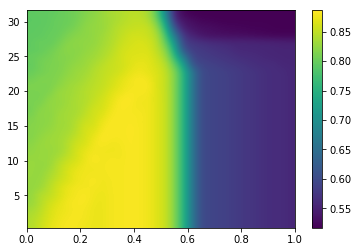

In [32]:
# Get the best parameters
import matplotlib.pyplot as plt

print("\n Rbf kernel - optimal hyper-parameters = {}".format(clf_rbf.best_params_))
print("\n Rbf kernel - best cross-val accuracy = {}".format(clf_rbf.best_score_))

## Plot the validation performance w.r.t. C and gamma

#import matplotlib.pyplot as plt
plt.imshow(clf_rbf.cv_results_["mean_test_score"].reshape(gamma_grid.shape[0],C_grid.shape[0]), 
           extent=[min(gamma_grid),max(gamma_grid),min(C_grid),max(C_grid)],
           interpolation="bicubic",aspect="auto")
plt.colorbar()
plt.show()

La figure obtenue est cohérente car la zone jaune correspond au meilleur score obtenu. On observe bien que pour  C=4.42
  et  γ=0.01
 , on est dans la zone jaune.
On peut alors télécharger le jeux de données test et effectuer les prédictions dessus grâce à notre modèle.

In [33]:
# load the test set inputs (they are stored in a sparse matrix)
#import scipy.sparse
Xtest = scipy.sparse.load_npz("./splice_t.npz")
y_test = clf_rbf.predict(Xtest)
df = pd.DataFrame(y_test)
df.to_csv("y_test.csv", sep=';', header=False)

In [34]:
Xtest

<2175x60 sparse matrix of type '<class 'numpy.float64'>'
	with 130500 stored elements in Compressed Sparse Row format>

In [35]:
y_test

array([-1., -1.,  1., ...,  1.,  1., -1.])

In [36]:
print(type(Xtest))
print(type(y_test))
print(Xtest.shape)
print(y_test.shape)

<class 'scipy.sparse.csr.csr_matrix'>
<class 'numpy.ndarray'>
(2175, 60)
(2175,)


On obtient alors un score de 90.39%.
Nous voulons comparer ce résultat avec un SVM linéaire.

In [40]:
C_grid = [i/100 for i in range (1, 150)]

from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# the grid
parameters = [{"C": C_grid}]

# the classifier
clf_lin = SVC(kernel="linear", tol=0.01)

# Perf a K-fold validation using the accuracy as the performance measure
K = 10 # feel free to adapt the value of $K$

# we will do it on a grid search using n_jobs processors
clf_lin = GridSearchCV(clf_lin, param_grid=parameters, cv=K, scoring="accuracy", verbose=1, n_jobs = 2)
clf_lin.fit(X, Y)

Fitting 10 folds for each of 149 candidates, totalling 1490 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    6.0s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:   15.3s
[Parallel(n_jobs=2)]: Done 446 tasks      | elapsed:   34.2s
[Parallel(n_jobs=2)]: Done 796 tasks      | elapsed:  1.1min
[Parallel(n_jobs=2)]: Done 1246 tasks      | elapsed:  1.9min
[Parallel(n_jobs=2)]: Done 1490 out of 1490 | elapsed:  2.4min finished


GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.01, verbose=False),
       fit_params=None, iid='warn', n_jobs=2,
       param_grid=[{'C': [0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1, 0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2, 0.21, 0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3, 0.31, 0.32, 0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4, 0.41, 0.42, 0.43, 0.44, 0.45, 0.46, 0.47, 0.4...33, 1.34, 1.35, 1.36, 1.37, 1.38, 1.39, 1.4, 1.41, 1.42, 1.43, 1.44, 1.45, 1.46, 1.47, 1.48, 1.49]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=1)

In [41]:
# Get the best parameters
print("\n Linear kernel - optimal hyper-parameters = {}".format(clf_lin.best_params_))
print("\n Linear kernel - best cross-val accuracy = {}".format(clf_lin.best_score_))


 Linear kernel - optimal hyper-parameters = {'C': 0.01}

 Linear kernel - best cross-val accuracy = 0.819


In [42]:
y_test_lin = clf_lin.predict(Xtest)
df = pd.DataFrame(y_test_lin)
df.to_csv("y_test_lin.csv", sep=';', header=False)

On obtient alors un score de 84.94% qui est moins satisfaisant que celui obtenu avec le SVM non-linéaire.

# 2- Classification de données marketing

Les données à traiter portent sur une campagne de marketing (par téléphone) d’une banque à destination de prospects. L’objectif est de prédire si un prospect va souscrire ou non à l’ouverture d’un compte. Les données sont disponibles sous Moodle ou téléchargeables sur https://archive.ics.uci.edu/ml/datasets/bank+marketing. <br>
Les détails sur les variables ainsi que les labels sont fournis sur le même site.

## 2.1 - Chargement des données et analyse sommaire

On suppose que le fichier des données bank-additional-full.csv est placé dans le répertoire de travail.

In [60]:
data = pd.read_csv("./bank-additional-full.csv", sep=";",header=0)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
age               41188 non-null int64
job               41188 non-null object
marital           41188 non-null object
education         41188 non-null object
default           41188 non-null object
housing           41188 non-null object
loan              41188 non-null object
contact           41188 non-null object
month             41188 non-null object
day_of_week       41188 non-null object
duration          41188 non-null int64
campaign          41188 non-null int64
pdays             41188 non-null int64
previous          41188 non-null int64
poutcome          41188 non-null object
emp.var.rate      41188 non-null float64
cons.price.idx    41188 non-null float64
cons.conf.idx     41188 non-null float64
euribor3m         41188 non-null float64
nr.employed       41188 non-null float64
y                 41188 non-null object
dtypes: float64(5), int64(5), object(11)
memory usa

On remarque qu'il y a des variables de type object, elles sont donc catégorielles. Il n'y a pas de valeurs manquantes.


## Visualisation des variables catégorielles et numériques.

In [38]:
# variables numeriques
var_num = list(data.columns[(data.dtypes=="int")|(data.dtypes=="float")])

print("\n On a {} variables numeriques : \n {} ".format(len(var_num) ,var_num))

# Variables categorielles
var_cat = list(data.columns[data.dtypes=="object"].drop("y")) 
print("\n On a {} variables categorielles : \n {} ".format(len(var_cat),var_cat))


 On a 10 variables numeriques : 
 ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'] 

 On a 10 variables categorielles : 
 ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome'] 


## Analyse statistique et sommaire des données à disposition en fonction des catégories


 Categories une des variables ['married' 'single' 'divorced' 'unknown']

 Analyse statistique selon la variable marital
Moyenne
                age    duration  campaign       pdays  previous  emp.var.rate  \
marital                                                                         
divorced  44.899393  253.790330   2.61340  968.639853  0.168690      0.163985   
married   42.307165  257.438623   2.57281  967.247673  0.155608      0.183625   
single    33.158714  261.524378   2.53380  949.909578  0.211359     -0.167989   
unknown   40.275000  312.725000   3.18750  937.100000  0.275000     -0.221250   

          cons.price.idx  cons.conf.idx  euribor3m  nr.employed  
marital                                                          
divorced       93.606563     -40.707069   3.715603  5170.878643  
married        93.597367     -40.270659   3.745832  5171.848772  
single         93.517300     -40.918698   3.317447  5155.199265  
unknown        93.471250     -40.820000   3.313037  51

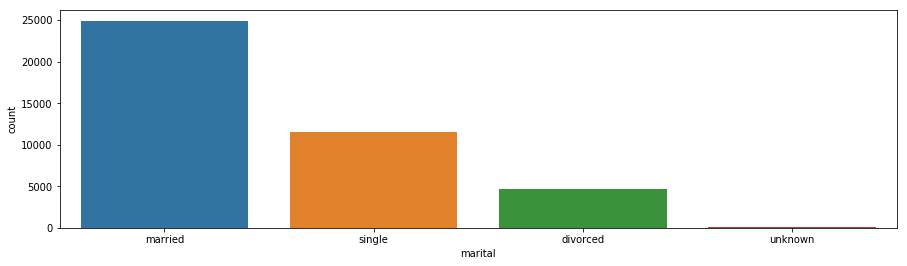

In [50]:
# Examen d'une des variables catégorielles
print("\n Categories une des variables {}".format(data["marital"]. unique()))
plt.figure(figsize = (15,4))
sb.countplot(x = "marital", data = data)

# analyse statistique selon la variable categorielle
print("\n Analyse statistique selon la variable marital") 
print("Moyenne")
print(data.groupby("marital").mean())
print("Variance")
print(data.groupby("marital").var())


 Categories une des variables ['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']

 Analyse statistique selon la variable education
Moyenne
                           age    duration  campaign       pdays  previous  \
education                                                                    
basic.4y             47.596504  264.827826  2.600575  965.704981  0.147031   
basic.6y             40.448953  264.414485  2.556283  980.368237  0.129145   
basic.9y             39.061208  261.291811  2.532341  979.133168  0.141439   
high.school          37.998213  260.886810  2.568576  964.358382  0.185917   
illiterate           48.500000  276.777778  2.277778  943.833333  0.111111   
professional.course  40.080107  252.533855  2.586115  960.765974  0.163075   
university.degree    38.879191  253.223373  2.563527  951.807692  0.192390   
unknown              43.481225  262.390526  2.596187  942.830734  0.226459   

               

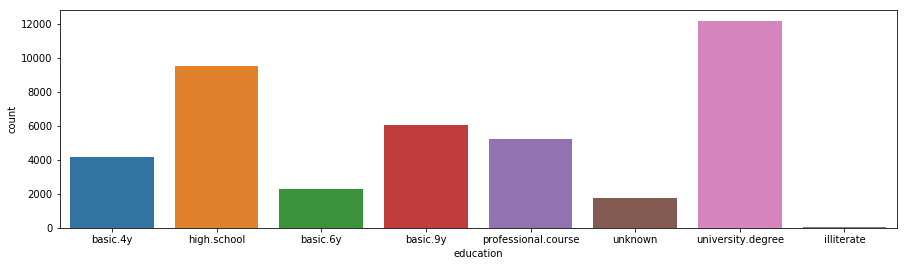

In [51]:
# Examen une des variables categorielles
print("\n Categories une des variables {}".format(data["education"].unique()))
plt.figure(figsize = (15,4))
sb.countplot(x = "education", data = data)
# analyse statistique selon la variable categorielle
print("\n Analyse statistique selon la variable education")
print("Moyenne")
print(data.groupby("education").mean())
print("Variance")
print(data.groupby("education").var())

On peut remarquer que les données ont des ordres de grandeur de valeurs différentes donc il sera nécessaire de les normaliser.


 Categories une des variables ['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']

 Analyse statistique selon la variable job
Moyenne
                     age    duration  campaign       pdays  previous  \
job                                                                    
admin.         38.187296  254.312128  2.623489  954.319229  0.189023   
blue-collar    39.555760  264.542360  2.558461  985.160363  0.122542   
entrepreneur   41.723214  263.267857  2.535714  981.267170  0.138736   
housemaid      45.500000  250.454717  2.639623  960.579245  0.137736   
management     42.362859  257.058140  2.476060  962.647059  0.185021   
retired        62.027326  273.712209  2.476744  897.936047  0.327326   
self-employed  39.949331  264.142153  2.660802  976.621393  0.143561   
services       37.926430  258.398085  2.587805  979.974049  0.154951   
student        25.894857  283.683429  2.104000 

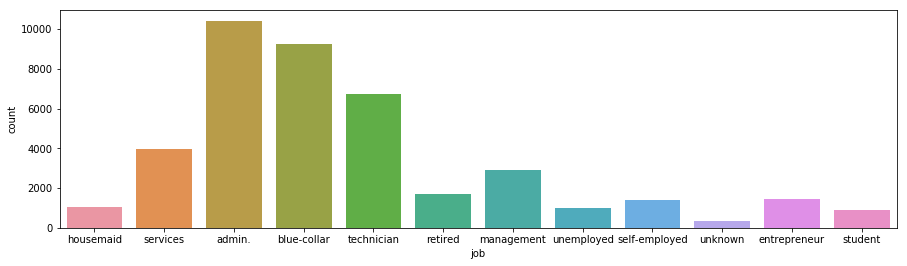

In [49]:
# Examen une des variables categorielles
print("\n Categories une des variables {}".format(data["job"].unique()))
plt.figure(figsize = (15,4))
sb.countplot(x = "job", data = data)
# analyse statistique selon la variable categorielle
print("\n Analyse statistique selon la variable job")
print("Moyenne")
print(data.groupby("job").mean())
print("Variance")
print(data.groupby("job").var())


 Categories une des variables ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']

 Analyse statistique selon la variable month
Moyenne
             age    duration  campaign       pdays  previous  emp.var.rate  \
month                                                                        
apr    40.593845  293.200608  1.947188  955.587386  0.323328     -1.800000   
aug    41.644221  232.430722  2.666559  961.062156  0.115410      0.747151   
dec    47.307692  345.609890  2.159341  748.060440  0.615385     -2.846154   
jul    39.035545  273.426122  3.160998  982.700725  0.047115      1.158921   
jun    39.766077  242.561301  3.072208  970.221512  0.083114      0.688379   
mar    40.778388  245.946886  2.203297  835.454212  0.483516     -1.800000   
may    39.031084  261.231752  2.439756  981.120415  0.164209     -0.164972   
nov    40.965618  245.855645  1.909290  952.950256  0.293587     -0.418483   
oct    44.171309  288.367688  1.545961  781.909471  0.647632     -2.43857

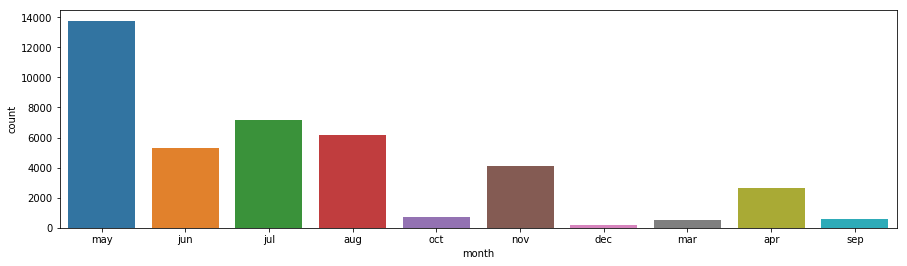

In [53]:
# Examen une des variables categorielles
print("\n Categories une des variables {}".format(data["month"].unique()))
plt.figure(figsize = (15,4))
sb.countplot(x = "month", data = data)
# analyse statistique selon la variable categorielle
print("\n Analyse statistique selon la variable month")
print("Moyenne")
print(data.groupby("month").mean())
print("Variance")
print(data.groupby("month").var())


 Categories une des variables ['no' 'yes']

 Analyse statistique selon la variable y
Moyenne
           age    duration  campaign       pdays  previous  emp.var.rate  \
y                                                                          
no   39.911185  220.844807  2.633085  984.113878  0.132374      0.248875   
yes  40.913147  553.191164  2.051724  792.035560  0.492672     -1.233448   

     cons.price.idx  cons.conf.idx  euribor3m  nr.employed  
y                                                           
no        93.603757     -40.593097   3.811491  5176.166600  
yes       93.354386     -39.789784   2.123135  5095.115991  
Variance
            age       duration  campaign          pdays  previous  \
y                                                                   
no    97.973013   42888.874702  8.256647   14558.079734  0.167444   
yes  191.475749  160938.869894  2.776371  162737.353553  0.740192   

     emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  nr.employe

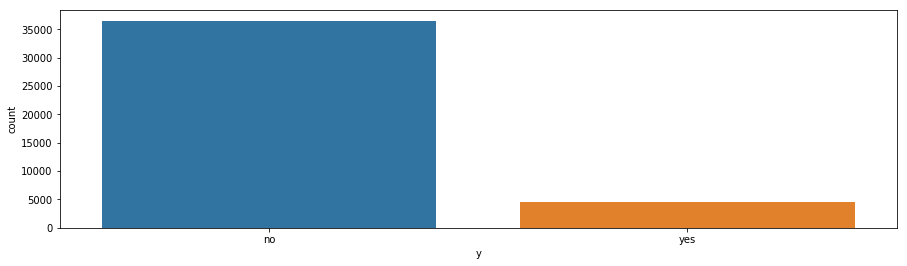

In [55]:
# Examen une des variables categorielles
print("\n Categories une des variables {}".format(data["y"].unique()))
plt.figure(figsize = (15,4))
sb.countplot(x = "y", data = data)
# analyse statistique selon la variable categorielle
print("\n Analyse statistique selon la variable y")
print("Moyenne")
print(data.groupby("y").mean())
print("Variance")
print(data.groupby("y").var())

In [56]:
print(data["y"].value_counts())

no     36548
yes     4640
Name: y, dtype: int64


Nous avons 2 classes no et yes. No contient 36548 observations tandis que yes contient 4640 observations.

## 2.2 - Encodage des variables catégorielles

Il n’est pas pratique de mettre en oeuvre des algorithmes de classification de type SVM ou régression logistique sur des variables catégorielles. Il convient de les transformer en valeur numérique. Pour cela nous utilisons le principe du <strong> one hot encoding </strong>.

In [61]:
#%% encoder les labels en utilisant la classe LabelEncoder() de scikit pour avoir des labels numeriques

# encodeur
encode_lab = LabelEncoder()

# encoder d abord les labels en 0 - 1
data["y"] = encode_lab.fit_transform(data["y"].values)

# encoder en one-hot-encoding les autres variables categorielles
print("Avant one-hot encoding")
print(data.columns)
print(data.shape)

# encodage
data = pd.get_dummies(data, columns=var_cat)
print("Apres one-hot encoding")
print(data.columns)
print(data.shape)

Avant one-hot encoding
Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')
(41188, 21)
Apres one-hot encoding
Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y',
       'job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'marital_unknown', 'education_basic.4y', 'education_basic.6y',
       'education_basic.9y', 'education_high.school', 'education_illiterate',
       'education_professional.course', 'education_univers

In [62]:
encode_lab

LabelEncoder()

In [66]:
data["y"].head()

0    0
1    0
2    0
3    0
4    0
Name: y, dtype: int64

In [65]:
data.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,0,1,0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,0,1,0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,0,1,0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,0,1,0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,0,1,0


On obtient alors un nombre de colonnes égales aux colonnes numériques + la somme des modalités des variables catégorielles.


## 2.3 - Réalisation de la classification

In [67]:
Y = data["y"].values
X = data.drop("y", axis=1).values #on selectionne toutes les variables sauf y et on les affecte à X

In [86]:
dfY = pd.DataFrame(Y)
print(dfY[0].unique())
print((dfY[0].value_counts()))

[0 1]
0    36548
1     4640
Name: 0, dtype: int64


## METHODE 1 : LDA & QDA

### Découpage des données en apprentissge et test et normalisation

In [88]:
# Découpage du jeu de données en apprentissage et test
Xa, Xt, Ya, Yt = train_test_split(X, Y, shuffle=True, test_size=0.4, stratify=Y)

In [89]:
# Normalisation des données 
sc = StandardScaler()
sc = sc.fit(Xa)
Xa = sc.transform(Xa)
Xt = sc.transform(Xt)

### LDA, QDA et calcul des erreurs de classification sur les données d'apprentissage et de test

In [90]:
# LDA sur données d'apprentissage et test et calculs d'erreur de classification

# LDA
clf_lda = LinearDiscriminantAnalysis(solver='svd', store_covariance = False)
clf_lda.fit(Xa, Ya)
Y_lda = clf_lda.predict(Xa)
err_lda = sum(Y_lda != Ya)/Ya.size
print('LDA : taux d''erreur apprentissage = {}%'.format(100*err_lda))
Y_ldat = clf_lda.predict(Xt)
err_ldat = sum(Y_ldat != Yt)/Yt.size
print('LDA : taux d''erreur test= {}%'.format(100*err_ldat))

print('\n \n')
# QDA
clf_qda = QuadraticDiscriminantAnalysis(store_covariance = False)
clf_qda.fit(Xa, Ya)
Y_qda = clf_qda.predict(Xa)
err_qda = sum(Y_qda!= Ya)/Ya.size
print('QDA : taux d''erreur apprentissage = {}%'.format(100*err_qda))
Y_qdat = clf_qda.predict(Xt)
err_qdat = sum(Y_qdat!= Yt)/Yt.size
print('QDA : taux d''erreur test = {}%'.format(100*err_qdat))

/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


LDA : taux derreur apprentissage = 9.015862738750405%
LDA : taux derreur test= 9.04952658412236%

 



/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:692: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:692: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


QDA : taux derreur apprentissage = 37.94108125606993%
QDA : taux derreur test = 38.3709638261714%


## METHODE 2 : Régression logistique 

### Découpage des données en apprentissge et test et normalisation

In [91]:
# Découpage des données initiales en app et test (proportion à choisir)

Xa, Xt, Ya, Yt = train_test_split(X, Y, shuffle=True, test_size =0.3, stratify=Y)

# les donnees app sont ensuite re-decoupées en app et validation (proportion au choix)
#Xa, Xv, Ya, Yv = train_test_split(Xa, Ya, shuffle=True, test_size=0.3, stratify=Ya)

#Normaliser les données
sc = StandardScaler(with_mean=True, with_std=True)
sc = sc.fit(Xa)
Xa = sc.transform(Xa)
#Xv = sc.transform(Xv)
Xt = sc.transform(Xt)


### Recherche de la valeur optimale du paramètre de régularisation C avec GridSearchCV

In [92]:
# Recherche de la valeur optimale du paramètre de régularisaton C avec GridSearchCV

C_grid = np.logspace(-1, 1, 50)

#C_grid = [i/100 for i in range (1, 150)]

#from sklearn.model_selection import GridSearchCV

# the grid
parameters = [{"C": C_grid}]

# the classifier
clf_reg = linear_model.LogisticRegression(tol=1e-5, multi_class='multinomial', solver='lbfgs') # solveur par defaut

#NB : mutlinomial marche même face à un cas de classification binaire, minimise perte, cf sklearn pour plus d'infos

# Perf a K-fold validation using the accuracy as the performance measure
K = 10 # feel free to adapt the value of $K$

# we will do it on a grid search using n_jobs processors
clf_reg = GridSearchCV(clf_reg, param_grid=parameters, cv=K, scoring="accuracy", verbose=1, n_jobs = 2)
clf_reg.fit(Xa, Ya)

Fitting 10 folds for each of 50 candidates, totalling 500 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:   27.5s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:  1.8min
[Parallel(n_jobs=2)]: Done 446 tasks      | elapsed:  3.9min
[Parallel(n_jobs=2)]: Done 500 out of 500 | elapsed:  4.3min finished


GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=1e-05, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=2,
       param_grid=[{'C': array([ 0.1    ,  0.10985,  0.12068,  0.13257,  0.14563,  0.15999,
        0.17575,  0.19307,  0.2121 ,  0.233  ,  0.25595,  0.28118,
        0.30888,  0.33932,  0.37276,  0.40949,  0.44984,  0.49417,
        0.54287,  0.59636,  0.65513,  0.71969,  0.7906 ,  0.86851,
        0.9541...87,
        5.17947,  5.68987,  6.25055,  6.86649,  7.54312,  8.28643,
        9.10298, 10.     ])}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=1)

### Calcul des erreurs de classification

In [93]:
# Calcul des erreurs de classification 

# Get the best parameters
print("\nRegression logistique - optimal hyper-parameters = {}".format(clf_reg.best_params_))
print("Regression logistique - best cross-val accuracy = {} \n".format(clf_reg.best_score_))

y_app_reg = clf_reg.predict(Xa)
err_app_reg = sum(y_app_reg != Ya)/Ya.size
print('Regression logistique : taux d''erreur apprentissage = {}%'.format(100*err_app_reg))

y_test_reg = clf_reg.predict(Xt)
err_test_reg = sum(y_test_reg != Yt)/Yt.size
print('Regression logistique : taux d''erreur test = {}%'.format(100*err_test_reg))


Regression logistique - optimal hyper-parameters = {'C': 0.49417133613238345}
Regression logistique - best cross-val accuracy = 0.9107557837050397 

Regression logistique : taux derreur apprentissage = 8.868925809025008%
Regression logistique : taux derreur test = 8.82900380351218%


# METHODE 3 : SVM linéaire 

### Découpage des données en apprentissage et test et normalisation

In [94]:
# Découpage des données initiales en app et test (proportion à choisir)

Xa, Xt, Ya, Yt = train_test_split(X, Y, shuffle=True, test_size =0.5, stratify=Y)

#Normaliser les données
sc = StandardScaler(with_mean=True, with_std=True)
sc = sc.fit(Xa)
Xa = sc.transform(Xa)
Xt = sc.transform(Xt)

### Recherche de la valeur optimale du paramètre de régularisation C avec GridSearchCV

In [95]:
C_grid = np.logspace(-1, 1, 7)
#C_grid = [i/100 for i in range (1, 150)]

#from sklearn.model_selection import GridSearchCV

# the grid
parameters = [{"C": C_grid}]

# the classifier
clf_svm_lin = SVC(kernel='linear', probability=True)

# Perf a K-fold validation using the accuracy as the performance measure
K = 5 # feel free to adapt the value of $K$

# we will dot it on a grid search using n_jobs processors
clf_svm_lin = GridSearchCV(clf_svm_lin, param_grid=parameters, cv=K, scoring="accuracy", verbose=1, n_jobs = 2)
clf_svm_lin.fit(Xa, Ya)

Fitting 5 folds for each of 7 candidates, totalling 35 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  35 out of  35 | elapsed: 53.9min finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=True, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=2,
       param_grid=[{'C': array([ 0.1    ,  0.21544,  0.46416,  1.     ,  2.15443,  4.64159,
       10.     ])}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=1)

### Calcul des erreurs de classification

In [96]:
# Get the best parameters
print("\nSVM linéaire - optimal hyper-parameters = {}".format(clf_svm_lin.best_params_))
print("SVM linéaire - best cross-val accuracy = {} \n".format(clf_svm_lin.best_score_))

y_app_svm_lin = clf_reg.predict(Xa)
err_app_svm_lin = sum(y_app_svm_lin != Ya)/Ya.size
print('SVM linéaire : taux d''erreur apprentissage = {}%'.format(100*err_app_svm_lin))

y_test_svm_lin = clf_svm_lin.predict(Xt)
err_test_svm_lin = sum(y_test_svm_lin != Yt)/Yt.size
print('SVM linéaire : taux d''erreur test = {}%'.format(100*err_test_svm_lin))


SVM linéaire - optimal hyper-parameters = {'C': 10.0}
SVM linéaire - best cross-val accuracy = 0.9084684859667864 

SVM linéaire : taux derreur apprentissage = 8.813246576672817%
SVM linéaire : taux derreur test = 9.42021948140235%


# METHODE 4 : SVM non-linéaire

### Chargement des données et normalisation

In [97]:
# Découpage des donnees initiales en app et test (proportion a choisir)
Xa, Xt, Ya, Yt = train_test_split(X, Y, shuffle=True, test_size =0.7, stratify=Y)

#Normaliser les données
sc = StandardScaler(with_mean=True, with_std=True)
sc = sc.fit(Xa)
Xa = sc.transform(Xa)
Xt = sc.transform(Xt)

### Recherche des valeurs optimales des paramètres C et gamma avec GridSearchCV

In [98]:
gamma_grid = np.logspace(-1.5, 0, 3)
C_grid = np.logspace(-1, 1.5, 3)

In [99]:
# the grid
parameters = [{"gamma": gamma_grid, "C": C_grid}]

# the classifier
clf_svm_rbf = SVC(kernel="rbf", tol=0.01, cache_size = 1000, probability=True)

# Perf a K-fold validation using the accuracy as the performance measure
K = 3 # feel free to adapt the value of $K$

# we will do it on a grid search using n_jobs processors
clf_svm_rbf = GridSearchCV(clf_svm_rbf, param_grid=parameters, cv=K, scoring="accuracy", verbose=1, n_jobs = 2)
clf_svm_rbf.fit(Xa, Ya)

Fitting 3 folds for each of 9 candidates, totalling 27 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  27 out of  27 | elapsed: 12.5min finished


GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=1000, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=True, random_state=None,
  shrinking=True, tol=0.01, verbose=False),
       fit_params=None, iid='warn', n_jobs=2,
       param_grid=[{'gamma': array([0.03162, 0.17783, 1.     ]), 'C': array([ 0.1    ,  1.77828, 31.62278])}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=1)

### Calcul des erreurs de classification

In [100]:
# Get the best parameters
print("\nSVM non linéaire - optimal hyper-parameters = {}".format(clf_svm_rbf.best_params_))
print("SVM non linéaire - best cross-val accuracy = {} \n".format(clf_svm_rbf.best_score_))

y_app_svm_rbf = clf_reg.predict(Xa)
err_app_svm_rbf = sum(y_app_svm_rbf != Ya)/Ya.size
print('SVM non linéaire : taux d''erreur apprentissage = {}%'.format(100*err_app_svm_rbf))

y_test_svm_rbf = clf_svm_rbf.predict(Xt)
err_test_svm_rbf = sum(y_test_svm_rbf != Yt)/Yt.size
print('SVM non linéaire : taux d''erreur test = {}%'.format(100*err_test_svm_rbf))


SVM non linéaire - optimal hyper-parameters = {'C': 1.7782794100389228, 'gamma': 0.03162277660168379}
SVM non linéaire - best cross-val accuracy = 0.8991583036581418 

SVM non linéaire : taux derreur apprentissage = 8.756879248947879%
SVM non linéaire : taux derreur test = 10.037458379578245%


# METHODE 5 : K PPV

### Découpage des données initiales en apprentissage et test

In [101]:
# decoupage des donnees initiales en app et test (proportion a choisir)
Xa, Xt, Ya, Yt = train_test_split(X, Y, shuffle=True, test_size =0.4, stratify=Y)

#Normaliser les données
sc = StandardScaler(with_mean=True, with_std=True)
sc = sc.fit(Xa)
Xa = sc.transform(Xa)
Xt = sc.transform(Xt)

### Kppv et GridSearchCV pour trouver 

In [102]:
from sklearn.neighbors import KNeighborsClassifier
k_values = [k for k in range(2,10)]

# the grid
parameters = [{"n_neighbors": k_values}]

# the classifier
clf_knn = KNeighborsClassifier()
# Perf a K-fold validation using the accuracy as the performance measure
K = 5 # feel free to adapt the value of $K$
# we will dot it on a grid search using n_jobs processors
clf_knn = GridSearchCV(clf_knn, param_grid=parameters, cv=K, scoring="accuracy", verbose=1, n_jobs = 2)
clf_knn.fit(Xa, Ya)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  40 out of  40 | elapsed: 59.4min finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid='warn', n_jobs=2,
       param_grid=[{'n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=1)

### Calcul des erreurs de classification

In [103]:
# Get the best parameters
print("\nKNN - optimal hyper-parameters = {}".format(clf_knn.best_params_))
print("KNN - best cross-val accuracy = {} \n".format(clf_knn.best_score_))

y_app_knn = clf_knn.predict(Xa)
err_app_knn = sum(y_app_knn != Ya)/Ya.size
print('KNN : taux d''erreur apprentissage = {}%'.format(100*err_app_knn))

y_test_knn = clf_knn.predict(Xt)
err_test_knn = sum(y_test_knn != Yt)/Yt.size
print('KNN : taux d''erreur test = {}%'.format(100*err_test_knn))


KNN - optimal hyper-parameters = {'n_neighbors': 9}
KNN - best cross-val accuracy = 0.8964875364195533 

KNN : taux derreur apprentissage = 9.064422143088379%
KNN : taux derreur test = 10.257344015537752%


# Comparaison des modèles

On split de nouveau les variables pour séléctionner un échantillon test sur lesquelles nous allons faire des prédictions avec les modèles entraînés. On pourrait l'appliquer sur toutes les variables mais le temps de calcul est trop long. 

### Découpage des données initiales en apprentissage et test

In [106]:
# decoupage des donnees initiales en app et test (proportion a choisir)
Xa, Xt, Ya, Yt = train_test_split(X, Y, shuffle=True, test_size =0.5, stratify=Y)

#Normaliser les données
sc = StandardScaler(with_mean=True, with_std=True)
sc = sc.fit(Xa)
Xa = sc.transform(Xa)
Xt = sc.transform(Xt)

# Prédiction sur les données de test et matrice de confusion

In [110]:
Y_ldat = clf_lda.predict(Xt)
Y_qdat = clf_qda.predict(Xt)
y_test_reg = clf_reg.predict(Xt)
y_test_svm_lin = clf_svm_lin.predict(Xt)
y_test_svm_rbf = clf_svm_rbf.predict(Xt)
y_test_knn = clf_knn.predict(Xt)


# matrices de confusion
confmat1 = confusion_matrix(y_true=Yt, y_pred=Y_ldat)
confmat2 = confusion_matrix(y_true=Yt, y_pred=Y_qdat)
confmat3 = confusion_matrix(y_true=Yt, y_pred=y_test_reg)
confmat4 = confusion_matrix(y_true=Yt, y_pred=y_test_svm_lin)
confmat5 = confusion_matrix(y_true=Yt, y_pred=y_test_svm_rbf)
confmat6 = confusion_matrix(y_true=Yt, y_pred=y_test_knn)

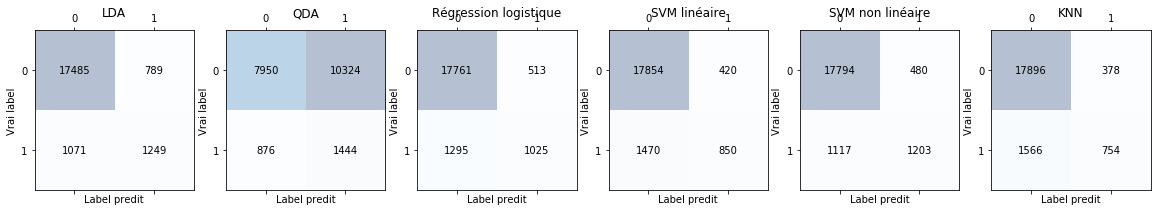

,LDA,QDA,Reg. Log,SVM lin,SVM non lin,KNN
Accuracy,0.909682,0.456152,0.912207,0.908226,0.922453,0.905604
Precision,0.612856,0.122706,0.666450,0.669291,0.714795,0.666078
Recall,0.538362,0.622414,0.441810,0.366379,0.518534,0.325000
F-mesure,0.573199,0.531363,0.531363,0.473538,0.601049,0.436848


In [112]:
import matplotlib.pyplot as plt

fig, (ax1, ax2, ax3, ax4, ax5, ax6) = plt.subplots(1, 6,figsize=(20,15))

ax1.matshow(confmat1, cmap=plt.cm.Blues, alpha=0.3)
ax2.matshow(confmat2, cmap=plt.cm.Blues, alpha=0.3)
ax3.matshow(confmat3, cmap=plt.cm.Blues, alpha=0.3)
ax4.matshow(confmat4, cmap=plt.cm.Blues, alpha=0.3)
ax5.matshow(confmat5, cmap=plt.cm.Blues, alpha=0.3)
ax6.matshow(confmat6, cmap=plt.cm.Blues, alpha=0.3)

for i in range(confmat1.shape[0]):
    for j in range(confmat1.shape[1]):
        ax1.text(x=j, y=i, s=confmat1[i, j], va="center", ha="center")
ax1.set(xlabel='Label predit', ylabel='Vrai label')
ax1.set_title('LDA')

for i in range(confmat2.shape[0]):
    for j in range(confmat2.shape[1]):
        ax2.text(x=j, y=i, s=confmat2[i, j], va="center", ha="center")
ax2.set(xlabel='Label predit', ylabel='Vrai label')
ax2.set_title('QDA')

for i in range(confmat3.shape[0]):
    for j in range(confmat3.shape[1]):
        ax3.text(x=j, y=i, s=confmat3[i, j], va="center", ha="center")
ax3.set(xlabel='Label predit', ylabel='Vrai label')
ax3.set_title('Régression logistique')

for i in range(confmat4.shape[0]):
    for j in range(confmat4.shape[1]):
        ax4.text(x=j, y=i, s=confmat4[i, j], va="center", ha="center")
ax4.set(xlabel='Label predit', ylabel='Vrai label')
ax4.set_title('SVM linéaire')

for i in range(confmat5.shape[0]):
    for j in range(confmat5.shape[1]):
        ax5.text(x=j, y=i, s=confmat5[i, j], va="center", ha="center")
ax5.set(xlabel='Label predit', ylabel='Vrai label')
ax5.set_title('SVM non linéaire')

for i in range(confmat6.shape[0]):
    for j in range(confmat6.shape[1]):
        ax6.text(x=j, y=i, s=confmat6[i, j], va="center", ha="center")
ax6.set(xlabel='Label predit', ylabel='Vrai label')
ax6.set_title('KNN')

plt.show()

import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score

# accuracy: (tp + tn) / (p + n)
# precision tp / (tp + fp)
# recall: tp / (tp + fn)
# f1: 2 tp / (2 tp + fp + fn)

accuracy_lda = accuracy_score(Yt, Y_ldat)
precision_lda = precision_score(Yt, Y_ldat)
recall_lda = recall_score(Yt, Y_ldat)
f1_lda = f1_score(Yt, Y_ldat)

accuracy_qda = accuracy_score(Yt, Y_qdat)
precision_qda = precision_score(Yt, Y_qdat)
recall_qda = recall_score(Yt, Y_qdat)
f1_qda = f1_score(Yt, Y_qdat)

accuracy_reg = accuracy_score(Yt, y_test_reg)
precision_reg = precision_score(Yt, y_test_reg)
recall_reg = recall_score(Yt, y_test_reg)
f1_reg = f1_score(Yt, y_test_reg)

accuracy_svn_lin = accuracy_score(Yt, y_test_svm_lin)
precision_svn_lin = precision_score(Yt, y_test_svm_lin)
recall_svn_lin = recall_score(Yt, y_test_svm_lin)
f1_svn_lin = f1_score(Yt, y_test_svm_lin)

accuracy_svn_rbf = accuracy_score(Yt, y_test_svm_rbf)
precision_svn_rbf = precision_score(Yt, y_test_svm_rbf)
recall_svn_rbf = recall_score(Yt, y_test_svm_rbf)
f1_svn_rbf = f1_score(Yt, y_test_svm_rbf)

accuracy_knn = accuracy_score(Yt, y_test_knn)
precision_knn = precision_score(Yt, y_test_knn)
recall_knn = recall_score(Yt, y_test_knn)
f1_knn = f1_score(Yt, y_test_knn)

resultats = {'LDA':[accuracy_lda, precision_lda, recall_lda, f1_lda],
        'QDA':[accuracy_qda, precision_qda, recall_qda, f1_reg],
        'Reg. Log':[accuracy_reg, precision_reg, recall_reg, f1_reg],
        'SVM lin':[accuracy_svn_lin, precision_svn_lin, recall_svn_lin, f1_svn_lin], 
        'SVM non lin':[accuracy_svn_rbf, precision_svn_rbf, recall_svn_rbf, f1_svn_rbf], 
        'KNN':[accuracy_knn, precision_knn, recall_knn, f1_knn]}

df_res = pd.DataFrame(resultats, index= ['Accuracy', 'Precision', 'Recall', 'F-mesure'])
df_res


Commentaires :
- Le modèle QDA identifie correctement 62% des prospects qui souscrivent à l’ouverture d’un compte.
- Pour évaluer les performances d'un modèle de façon complète, vous devez analyser à la fois la précision et le rappel. Malheureusement, précision et rappel sont fréquemment en tension. Ceci est dû au fait que l'amélioration de la précision se fait généralement au détriment du rappel et réciproquement. Différents outils statistiques ont été créés pour évaluer simultanément la précision et le rappel. La F-mesure en fait partie.
- Si on se base sur la F1-mesure et l'Accuracy, c'est la SVM non-linéaire qui est le meilleur classifieur.

Métriques : 
- Accuracy_score : ??
- Precision_score : pas toujours la métrique du modèle global à utiliser lors de la sélection du meilleur modèle  
- Recall_score : 
- F1_score : fonction de la précision et du recall à utiliser sir nous devons chercher un équilibre entre précision et rappel

0


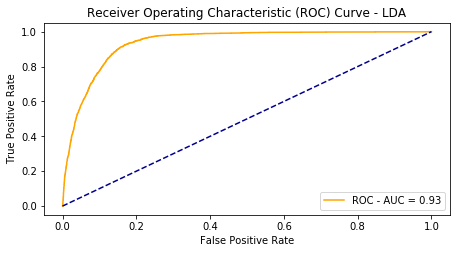

1


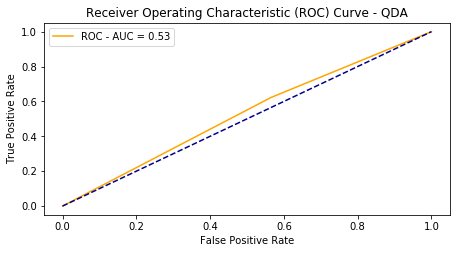

2


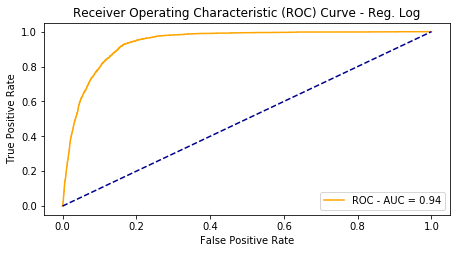

3


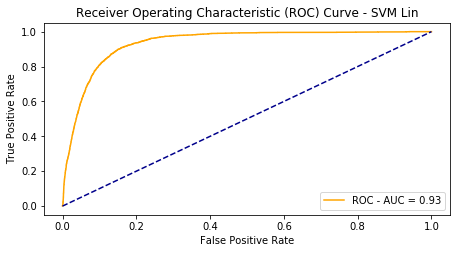

4


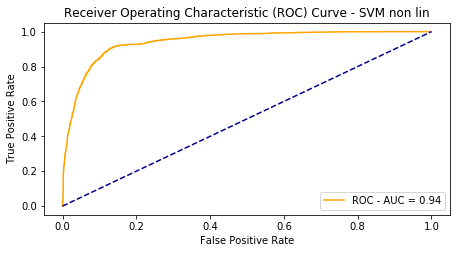

5


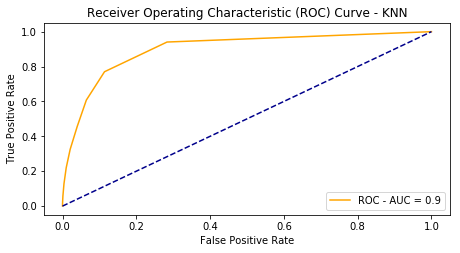

In [115]:
from sklearn.metrics import roc_curve #voir a quoi correspodnent chacune des metriques
from sklearn.metrics import roc_auc_score


def plot_roc_curve(fpr, tpr, AUC, modele): 
    plt.plot(fpr, tpr, color='orange', label='ROC - AUC = ' + str(round(AUC,2)))
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve - ' + modele)
    plt.legend()
    plt.show()
    
#fpr : false positive rate
#tpr : true positive rate
    
Y_ldat_proba = clf_lda.predict_proba(Xt)
Y_qdat_proba = clf_qda.predict_proba(Xt)
y_test_reg_proba = clf_reg.predict_proba(Xt)
y_test_svm_lin_proba = clf_svm_lin.predict_proba(Xt)
y_test_svm_rbf_proba = clf_svm_rbf.predict_proba(Xt)
y_test_knn_proba = clf_knn.predict_proba(Xt)

modele = ["LDA", "QDA", "Reg. Log", "SVM Lin", "SVM non lin", "KNN"]
res = [Y_ldat_proba[:,1], Y_qdat_proba[:,1], y_test_reg_proba[:,1], y_test_svm_lin_proba[:,1], y_test_svm_rbf_proba[:,1], y_test_knn_proba[:,1]]

for i, nom_modele in enumerate(modele): 
    print(i)
    auc = roc_auc_score(Yt, res[i])    
    fpr, tpr, thresholds = roc_curve(Yt, res[i])
    plt.figure(figsize=(16, 12))
    plt.subplot(3,2,i+1)
    plot_roc_curve(fpr, tpr, auc, nom_modele)

On peut constater graphiquement que c'est la SVM non-linéaire qui donne les meilleurs résultats car la courbe se rapproche de (1,1) classifieur idéal et c'est le graphique ayant l'aire le plus grand.

Nous allons comparer les modèles LDA, regréssion logistique et SVM non linéaire.


In [116]:
from sklearn.metrics.cluster import contingency_matrix
from statsmodels.stats.contingency_tables import mcnemar #voir à quoi sert le test de mcnemar

TC_LDA_REGLOG = contingency_matrix(Y_ldat, y_test_reg )
TC_LDA_SVM_NL = contingency_matrix(Y_ldat, y_test_svm_rbf )
TC_REGLOG_SVM_NL = contingency_matrix(y_test_reg, y_test_svm_rbf )

result_LDA_REGLOG = mcnemar(TC_LDA_REGLOG, exact=True)
result_LDA_SVM_NL = mcnemar(TC_LDA_SVM_NL, exact=True)
result_REGLOG_SVM_NL = mcnemar(TC_REGLOG_SVM_NL, exact=True)

resultats = {'LDA / Reg. log':[result_LDA_REGLOG.statistic, result_LDA_REGLOG.pvalue],
        'LDA / SVM non lin':[result_LDA_SVM_NL.statistic, result_LDA_SVM_NL.pvalue],
        'Reg. Log / SVM non lin':[result_REGLOG_SVM_NL.statistic, result_REGLOG_SVM_NL.pvalue]}

df_res = pd.DataFrame(resultats, index= ['Statistic', 'p-value'])
df_res

,LDA / Reg. log,LDA / SVM non lin,Reg. Log / SVM non lin
Statistic,2.100000e+01,4.510000e+02,511.000000
p-value,4.963375e-126,9.003419e-24,0.000024


Les 3 p values sont inférieurs à 0.05, ce qui veut dire que l'hypothèse nulle H0 est rejetée. Pour rappel (cf ci-dessous pour plus de détails, H0 : les 2 classifieurs ot une proportion d'erreurs similaire sur l'ensemble de test.

### Aparté : métriques 

- Courbe ROC (Receiving Operator Characteristic) : communément utilisé pour mesurer la performance d'un classifieur binaire.
- les courbes ROC furent inventées pendant la seconde Guerre mondiale pour montrer la séparation entre les signaux radar et le bruit de fond
- La courbe ROC est un système qui a pour objectif de catégoriser des éléments en deux groupes distincts sur la base d'une ou plusieurs des caractéristiques de chacun de ces éléments.
- Graphiquement, on représente souvent la mesure ROC sous la forme d'une courbe qui donne le taux de vrais positifs (fraction de positifs qui sont correctement détectés) en fonction du taux de faux positifs (fraction des négatifs qui sont incorrectement détectés)
- La courbe ROC introduit aussi des termes comme precision, rappel, AUC.    

### Interprétation courbe ROC  (Receiving Operator Characteristic)


<strong> <font color="red"> Plus une courbe se rapproche du point parfait (precision, recall) = (1,1), meileur sera le classifieur. (et plus grande sera l'aire du graphique)

- à (0,0), le classifieur déclare toujours négatif (TN ou FN, il n'y a pas de TP ou FP)
- à (1,1), le classifieur déclare toujours positif (TP ou FP, il n'y a pas de TN ou FN)
- à (0,1), le classifieur n'a aucun FAUX (FP ou FN), et est parfaitement exact, ne se trompant jamais
- à (1,0), le classifieur n'a aucun VRAI (TP ou TN), et est parfaitement inexact, se trompant toujours, il suffit de calculer son inverse pour avoir un classifieur parfaitement exact
- Le classifieur idéal passe par les 3 points suivants (0,0), (0,1), (1,1) et fait un moitié de carré
- Interprétation courbe ROC : plus la courbe ROC se rapproche du classifieur idéal, plus l'aire du graphique est grande, plus le classifieur est performant.
- DOMAINE MEDICAL : l'intérêt de la courve ROC dans le domaine médical a été souligné depuis 1960. Cet outil statistique a été utilisé notamment dans le domaine pharmaceutique, en radiologie et en biologie. 
- La courbe ROC s'est imposée en biologie clinique depuis plusieurs années . Elle permet la détermination et la comparaison des performances diagnostiques de plusieurs tests à l'aide de l'évaluation des aires sous la courbe. Elle est aussi utilisée pour estimer la valeur seuil optimale d'un test en tenant compte des données épidémiologiques et médico-économiques de la maladie.


### Précision et rappel

- précision : combien de candidats sélectionnés sont pertinents
- rappel (=sensibilité) : combien d'éléments pertinents sont sélectionnées 
- éléments pertinents = faux négatifs + vrais négatifs (FN+TP) (correspond aux 2 cases du bas de la matrice de confusion)
- F-mesure ou F-score ou F1 : combine précision et rappel, moyenne harmonique) 

$$
P = TP + TN / (TP + TN + FP + FN)
$$

autrement dit P = true / true + false

$$
R = TP / TP + FN
$$

autrement dit R = TP / éléments pertinents

$$
F1 = F-mesure = F-score = 2*(P*R/P+R)
$$

### AUC (Area Under Curve)

C'est une mesure de confiance qu'a le classifieur dans ses propres prédictions 


NB : <br>
=> Mesurer la performance d'un classifieur n'est pas chose aisée car un classifieur peut être bon pour une métrique et mauvais pour une autre. Choisir en avance de phase une métrique qui correspond le mieux à une éventuelle action métier sur les prédictions ou à un gain financer potentiel est essentiel. Cela peut être par exemple une AUC ou un recall à précision fixée. Il est donc fondamental de s’approprier la métrique utilisée car elle est d’une certain manière la passerelle entre la modélisation théorique et la réalité.

### Test de Mc Nemar

- Le test d'hypothèse statistique de Mc Nemar permet de comparer des modèles de classifieurs sur un jeu de données de test.
- Ce test convient aux modèles couteux à former et aux modèles de deep learning.
- Le test de Mc Nemar vérifie si les désaccords entre 2 classifieurs correspondent (c'est un peu comme un test d'homogénéité)
- Ce test est largement utilisé en médecine pour comparer l'effet d'un traitement avec un témoin
- NB : on compare des classifieurs BINAIRES pas multiclasses.


LE TEST DE MC NEMAR APPLIQUÉ AUX CLASSIFIEURS : 


- H0 : les 2 algorithmes (classifieurs) ont une proportion  d'erreurs SIMILAIRE sur l'ensemble de test.

=> autrement dit, il y a très peu de différence dans les désaccords entre les 2 classifieurs 

- H1 :  les 2 algorithmes (classifieurs) ont une proportion  d'erreurs DIFFERENTE sur l'ensemble de test.   



- p> alpha : ne pas rejeter H0, aucune différence dans le désaccord (par exemple, le traitement n'a eu aucun effet).
- p <= alpha : rejeter H0, différence significative dans le désaccord (par exemple, le traitement a eu un effet).

### Sources

- https://fr.wikipedia.org/wiki/Courbe_ROC
- https://fr.wikipedia.org/wiki/Précision_et_rappel
- https://blog.octo.com/quel-sens-metier-pour-les-metriques-de-classification/
- https://developers.google.com/machine-learning/crash-course/classification/precision-and-recall?hl=fr
- https://towardsdatascience.com/accuracy-precision-recall-or-f1-331fb37c5cb9
- https://datatofish.com/confusion-matrix-python/
- https://statistique-et-logiciel-r.com/comparaisons-de-deux-proportions-appariees-le-test-de-mac-nemar/
- https://machinelearningmastery.com/mcnemars-test-for-machine-learning/